In [4]:
import pandas as pd
import numpy as np
sales = pd.read_csv("Sales Data.csv")
sales

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


In [5]:
# Check for missing values
print(sales.isnull().sum())
# Handle missing values
sales.dropna(inplace=True)

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [6]:
duplicate_rows_count = sales.duplicated().sum()
print(duplicate_rows_count)
sales.drop_duplicates(inplace=True)

0


In [7]:
sales.shape

(185950, 11)

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 185949
Data columns (total 11 columns):
Unnamed: 0          185950 non-null int64
Order ID            185950 non-null int64
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int64
Sales               185950 non-null float64
City                185950 non-null object
Hour                185950 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 17.0+ MB


In [9]:
# Calculate summary statistics
print(sales.describe())

          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [ ]:
# Calculate mean for numerical variables
mean_values = sales.mean()
print("Mean Values:",mean_values)

In [ ]:
# Calculate median for numerical variables
median_values = sales.median()
print("Median Values:",median_values)

In [ ]:
# Calculate mode for numerical variables (mode() can return multiple modes, so we need to handle it accordingly)
mode_values = sales.mode().iloc[0]  # Select the first row (most frequent values) as the mode
print("Mode Values:",mode_values)

In [ ]:
# Calculate standard deviation for numerical variables
std_values = sales.std()
print("Standard Deviation:",std_values)

**1) What are the trends in sales over time?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with columns 'Order Date' and 'sales_amount'
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['month'] = sales['Order Date'].dt.to_period('M')
sales_over_time = sales.groupby('month')['Sales'].sum()

# Convert the Period index to strings for plotting
sales_over_time.index = sales_over_time.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.show()



**2) Which products are the best sellers?**

In [12]:
best_selling_products = sales.groupby('Order ID')['Quantity Ordered'].sum().nlargest(10)
print(best_selling_products)


Order ID
211097    9
226483    9
227096    9
224719    8
237807    8
241241    8
261442    8
278566    8
288689    8
291034    8
Name: Quantity Ordered, dtype: int64


**3) What is the most profitable product?**

In [13]:
most_profitable_product = sales.groupby('Order ID')['Price Each'].sum().idxmax()
print(f"The most profitable product is {most_profitable_product}")


The most profitable product is 202212


**4) What are the top five popular product demographics?**

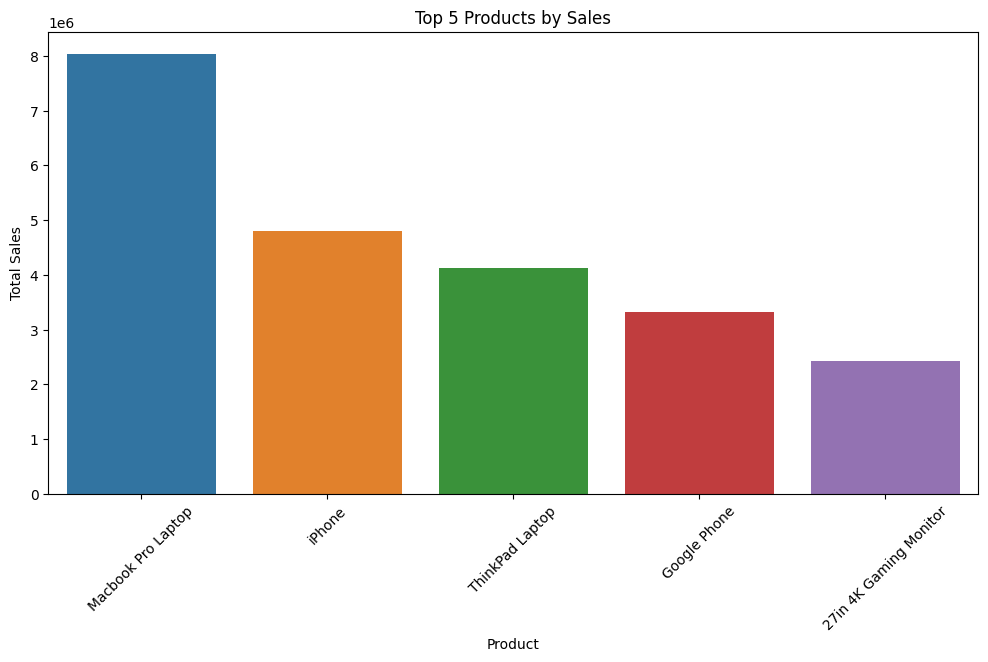

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with columns 'Product' and 'sales_amount'
# Group by 'Product' and sum the 'sales_amount' to find total sales per product
product_sales = sales.groupby('Product')['Sales'].sum().reset_index()

# Sort the products by total sales in descending order and get the top 4
top_5_products = product_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_5_products, x='Product', y='Sales')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**5) What are the best times of year to sell?**

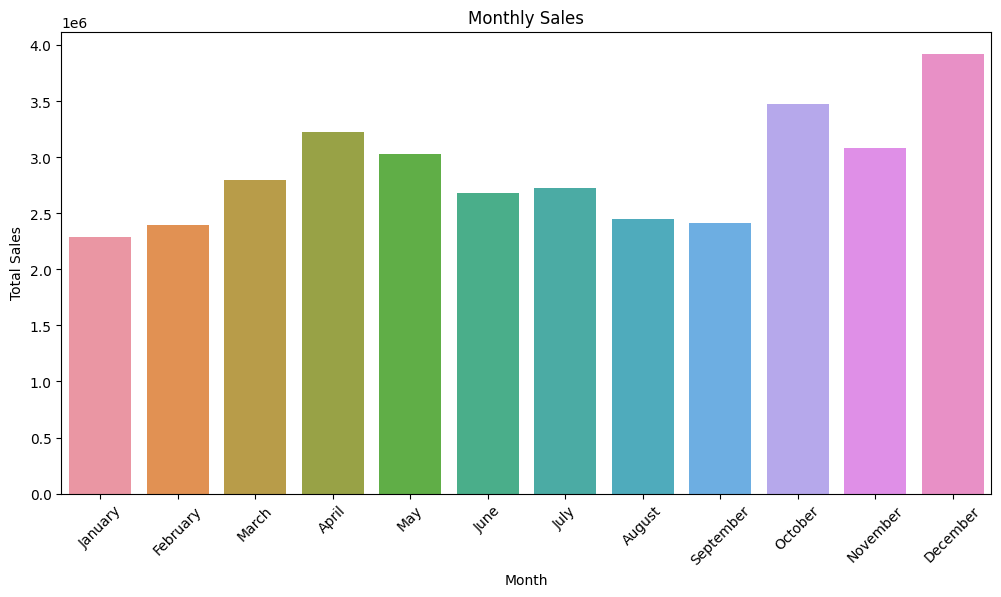

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sales' with a 'Order Date' column
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Group by month and sum the 'Sales' column
monthly_sales = sales.groupby(sales['Order Date'].dt.strftime('%B'))['Sales'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



**6) What are the best marketing channels?**

In [16]:
marketing_channels = sales.groupby('Product')['Sales'].sum().nlargest(10)
print(marketing_channels)




Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Sales, dtype: float64
